In [1]:
!pip install top2vec
!pip install top2vec[sentence_encoders]

In [2]:
from top2vec import Top2Vec
import glob

2023-12-12 10:53:25.447192: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-12 10:53:25.486952: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 10:53:25.487040: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 10:53:25.487938: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-12 10:53:25.493799: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-12 10:53:25.494443: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
data = []
for f in glob.glob('xtract/article_*.txt'):
    with open(f, "r") as file:
        text = file.read()
        text = text.replace('\n', ' ')
        data.append(text)

In [4]:
len(data), data[0]

(2062,
 '[Übersicht Feuilleton]  [nächster Artikel]  Eine CD-Retrospektive versammelt das musikalische Schaffen des Dichters, Sängers und Klangavantgardisten Max Goldt  [article image]  Ein Mann für die existenzielle Melancholie: Max Goldt auf einem Foto von 1980  Von Jens Balzer  Einem vornehmlich literarisch interessierten Publikum wurde Max Goldt seit Mitte der Achtzigerjahre als Autor von Kolumnen und Büchern wie _Mein äußerst schwer erziehbarer schwuler Schwager aus der Schweiz_ oder _Ungeduscht, geduzt und ausgebuht_ ein Begriff. In diesen frühen Titeln schimmern deutlich schon drei wesentliche Charakteristika des Goldtschen Sprachschaffens durch: ein konsonanten- wie vokalhäufungsverliebter Vorrang der Form vor dem Inhalt; ein genereller Vorbehalt gegenüber der Welt und gegenüber den in dieser wohnenden Wesen; sowie schließlich eine existenzielle Melancholie, die aus diesem Vorbehalt und der sich aus ihm speisenden Einsamkeit rührt. Zeit seiner künstlerischen Karriere hat sich M

In [5]:
model = Top2Vec(documents=data, speed="learn", workers=8)

2023-12-12 10:53:34,183 - top2vec - INFO - Pre-processing documents for training
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-12-12 10:53:39,709 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
2023-12-12 10:54:30.476538: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-12-12 10:54:32,047 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-12 10:58:18,190 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2ve

In [6]:
model.get_num_topics()

25

In [7]:
topic_words, word_scores, topic_nums = model.get_topics(25)

In [8]:
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [12]:
for t in topic_words[22]:
    print(t)

katholische
kirche
katholischen
pfarrer
kirchen
papst
religion
osterreich
heiligen
kardinal
papa
judische
holocaust
osterreichische
christen
synagoge
gemeinde
christian
minister
historiker
gott
insekten
glauben
jerusalem
kanzleramt
gottes
antisemitismus
reformen
seehofer
nazi
schloss
heinrich
krisen
orgel
hoffentlich
reform
wenigstens
kaum
institutionen
jesus
konservativen
auschwitz
brandenburg
schlimm
jahrzehnten
radikal
jahrhundert
jahrhunderts
martenstein
keller


In [11]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=7, num_docs=5)
documents

array(['[Übersicht Politik]  [nächster Artikel]  [article image]  Im Kampf gegen die Klimakrise überwiegt der Pessimismus. Dabei ist das Umsteuern alles andere als utopisch, wie zwei neue Studien zeigen  Von Petra Pinzler  Warum ist es so schwer, das Klima zu schützen? Weil es so teuer ist? Weil es ziemlich kompliziert ist? Weil niemand weiß, wie das überhaupt geht?  Falsch. In der vergangenen Woche sind gleich mehrere renommierte Wissenschaftler in umfangreichen Studien zu dem einen interessanten Ergebnis gekommen: Es wäre in Deutschland finanzierbar, technisch möglich und ökonomisch verkraftbar, den Ausstoß von Treibhausgasen so sehr zu verringern, dass die international verabredeten Klimaziele eingehalten werden. Dafür wäre keine Revolution nötig, die Deutschen müssten nicht mal völlig auf ihr Auto verzichten und auch nicht immer auf ihr Schnitzel.  Das Wuppertal-Institut für Klima, Umwelt und Energie macht in seiner Studie im Auftrag der Fridays-for-Future-Bewegung folgende Rechnun

In [24]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=12, num_docs=2)
documents

array(['[Übersicht Wissen]  [nächster Artikel]  Anja Karliczek (*1971), Bundesministerin für Bildung und Forschung, in einem Interview mit der »Rheinischen Post«  nächster Artikel:  Küchenpsychologie: Denkt man eher mit der rechten oder der linken Hirnhälfte? [Übersicht Wissen] [Ressort-Übersicht] ',
       '[Übersicht Wissen]  [nächster Artikel]  Stefan Zweig (1881–1942), österreichischer Schriftsteller, in seiner Novellensammlung »Amok«  nächster Artikel:  Bundesrepublik Heißland [Übersicht Wissen] [Ressort-Übersicht] '],
      dtype=object)

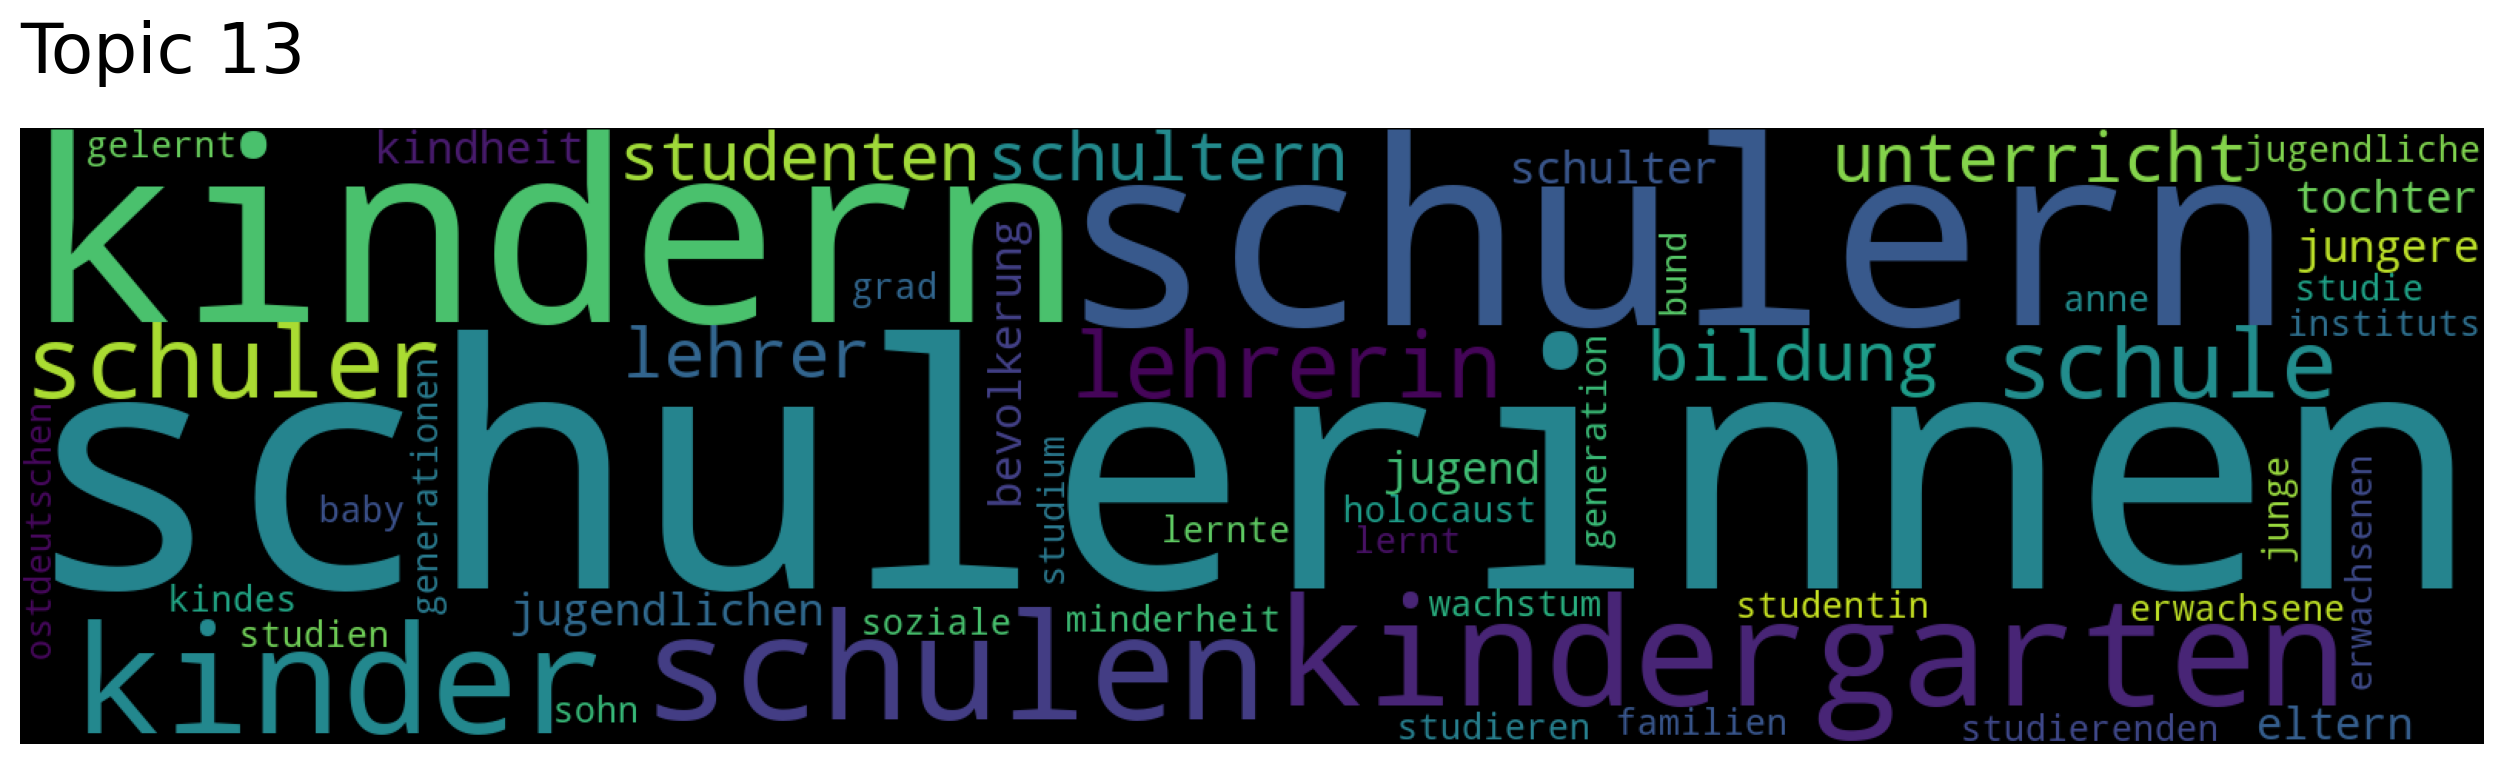

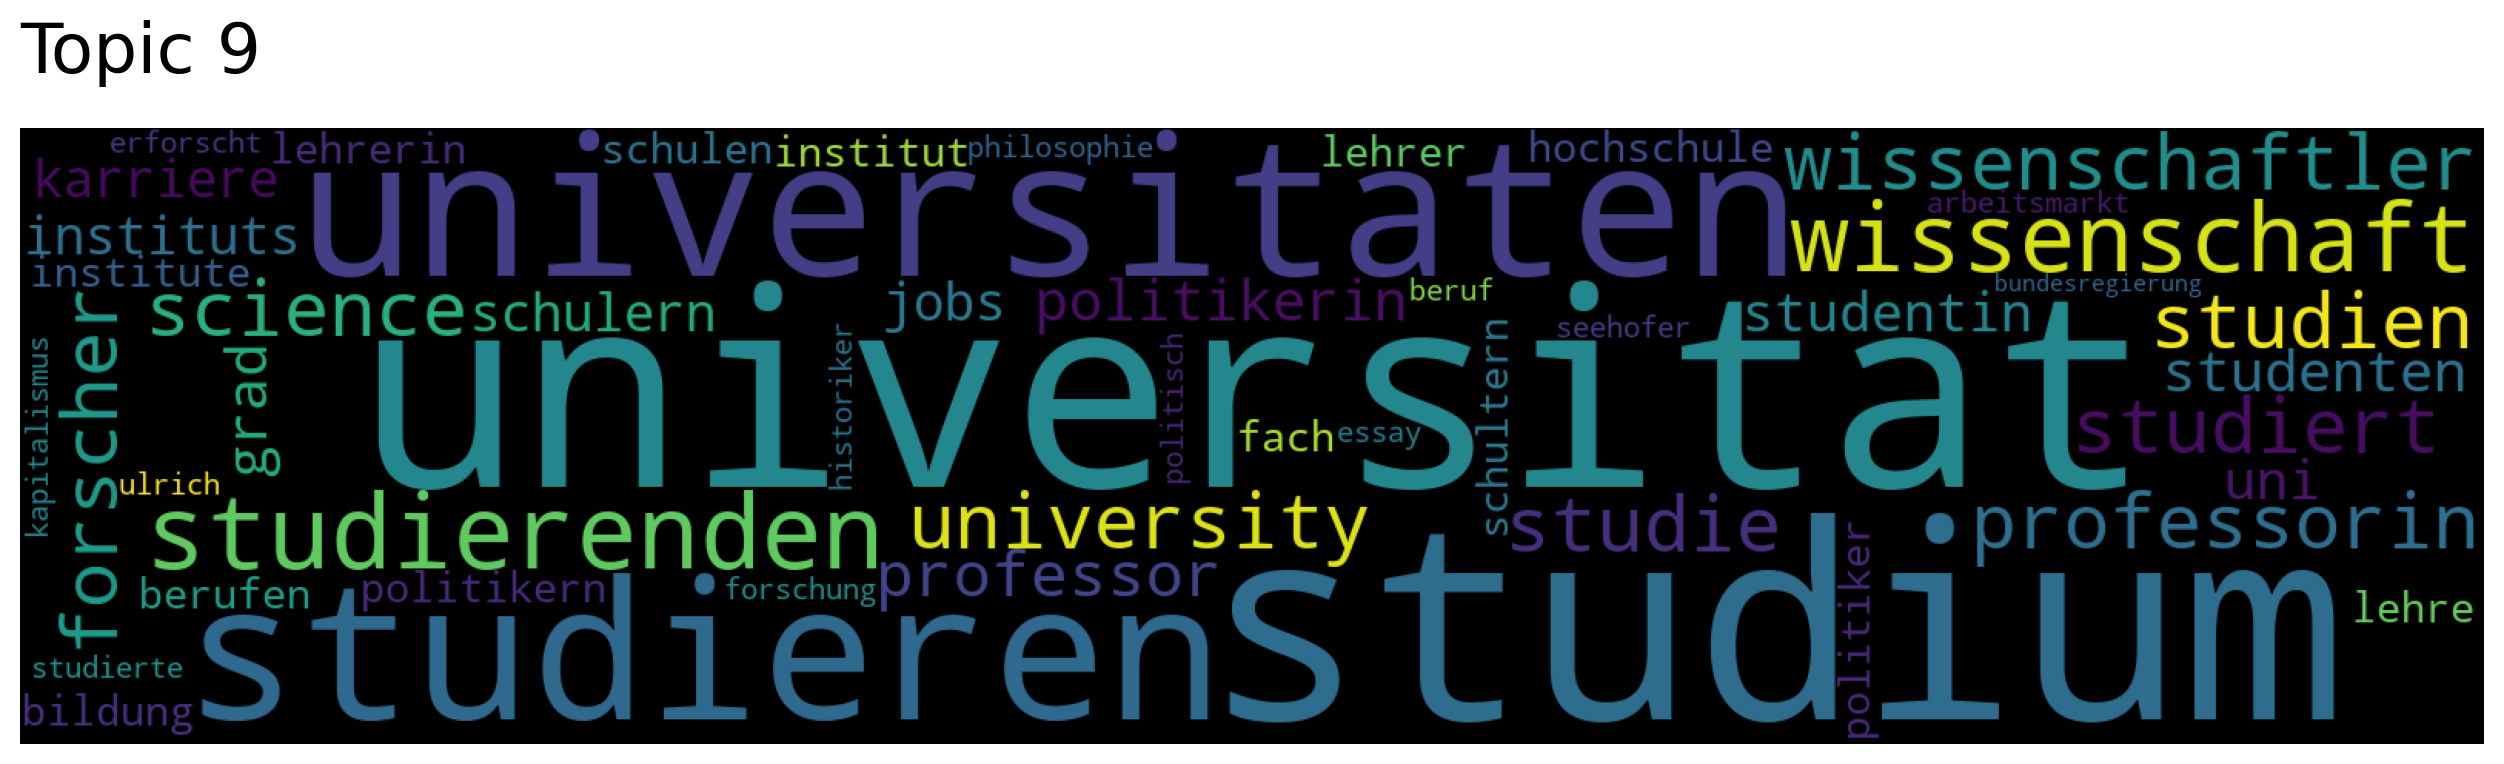

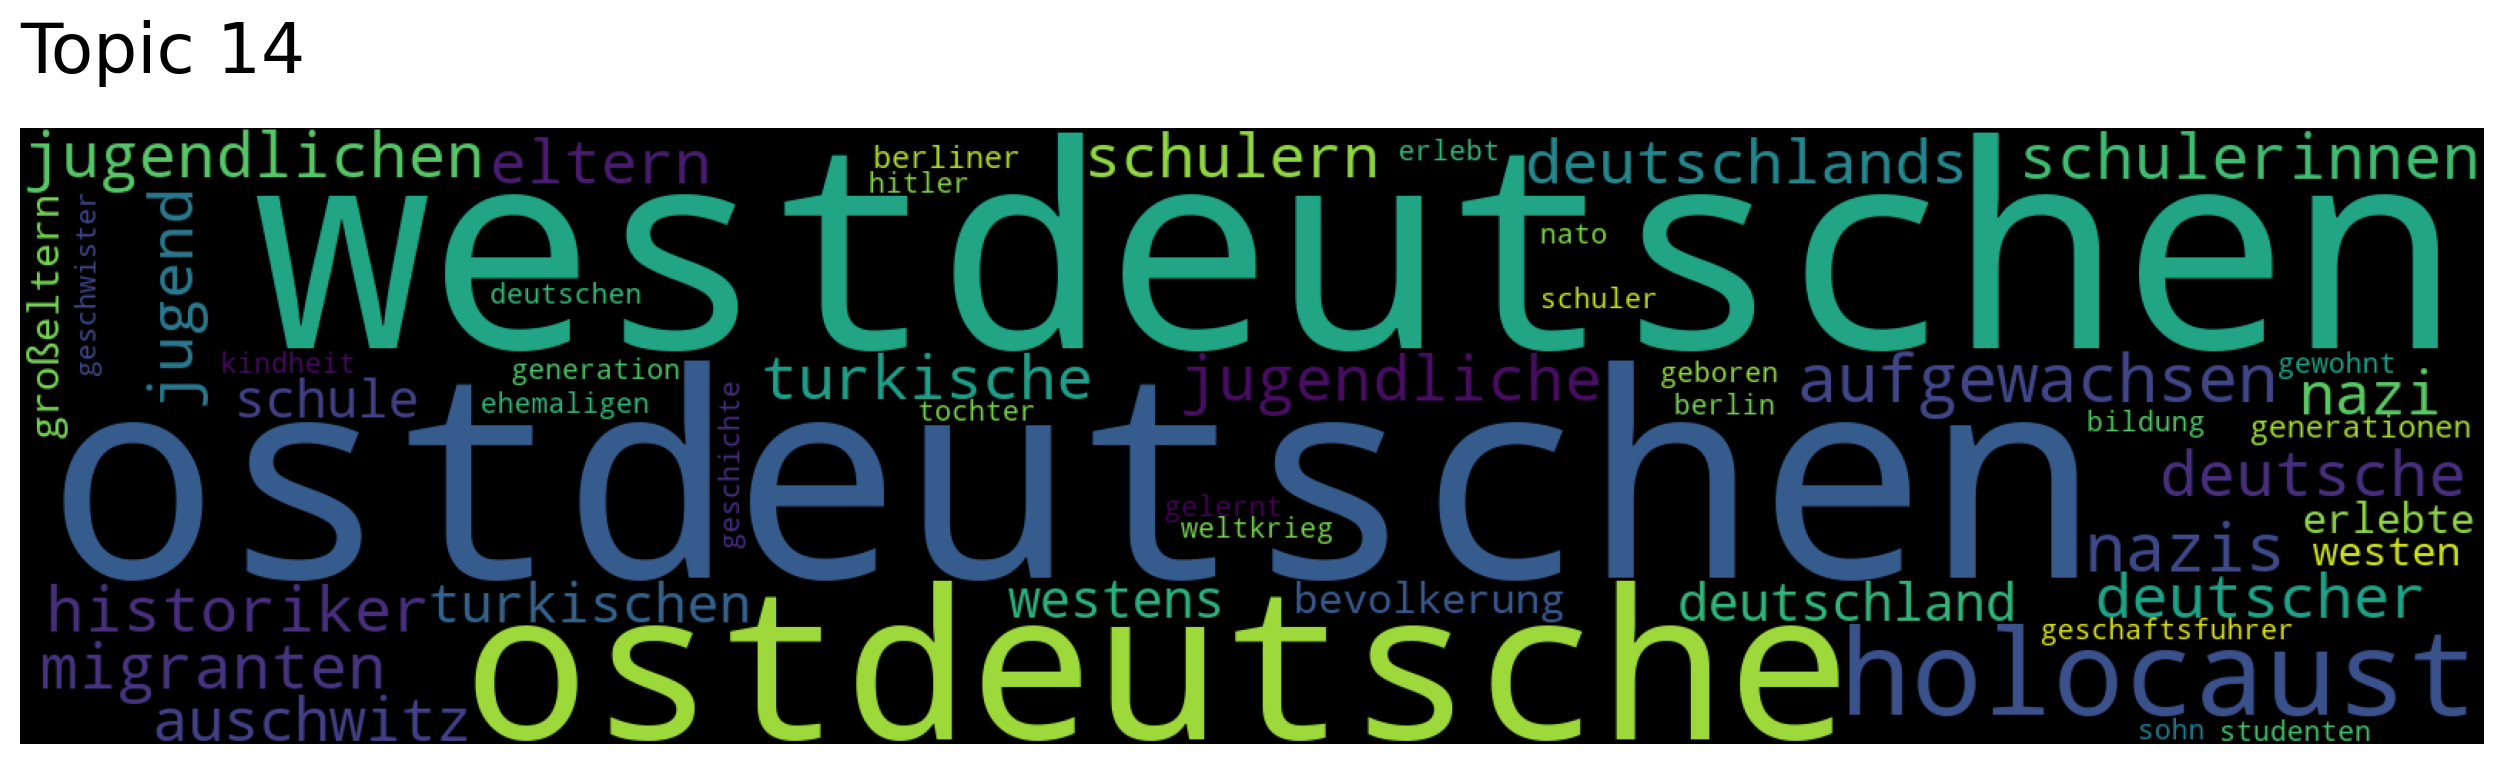

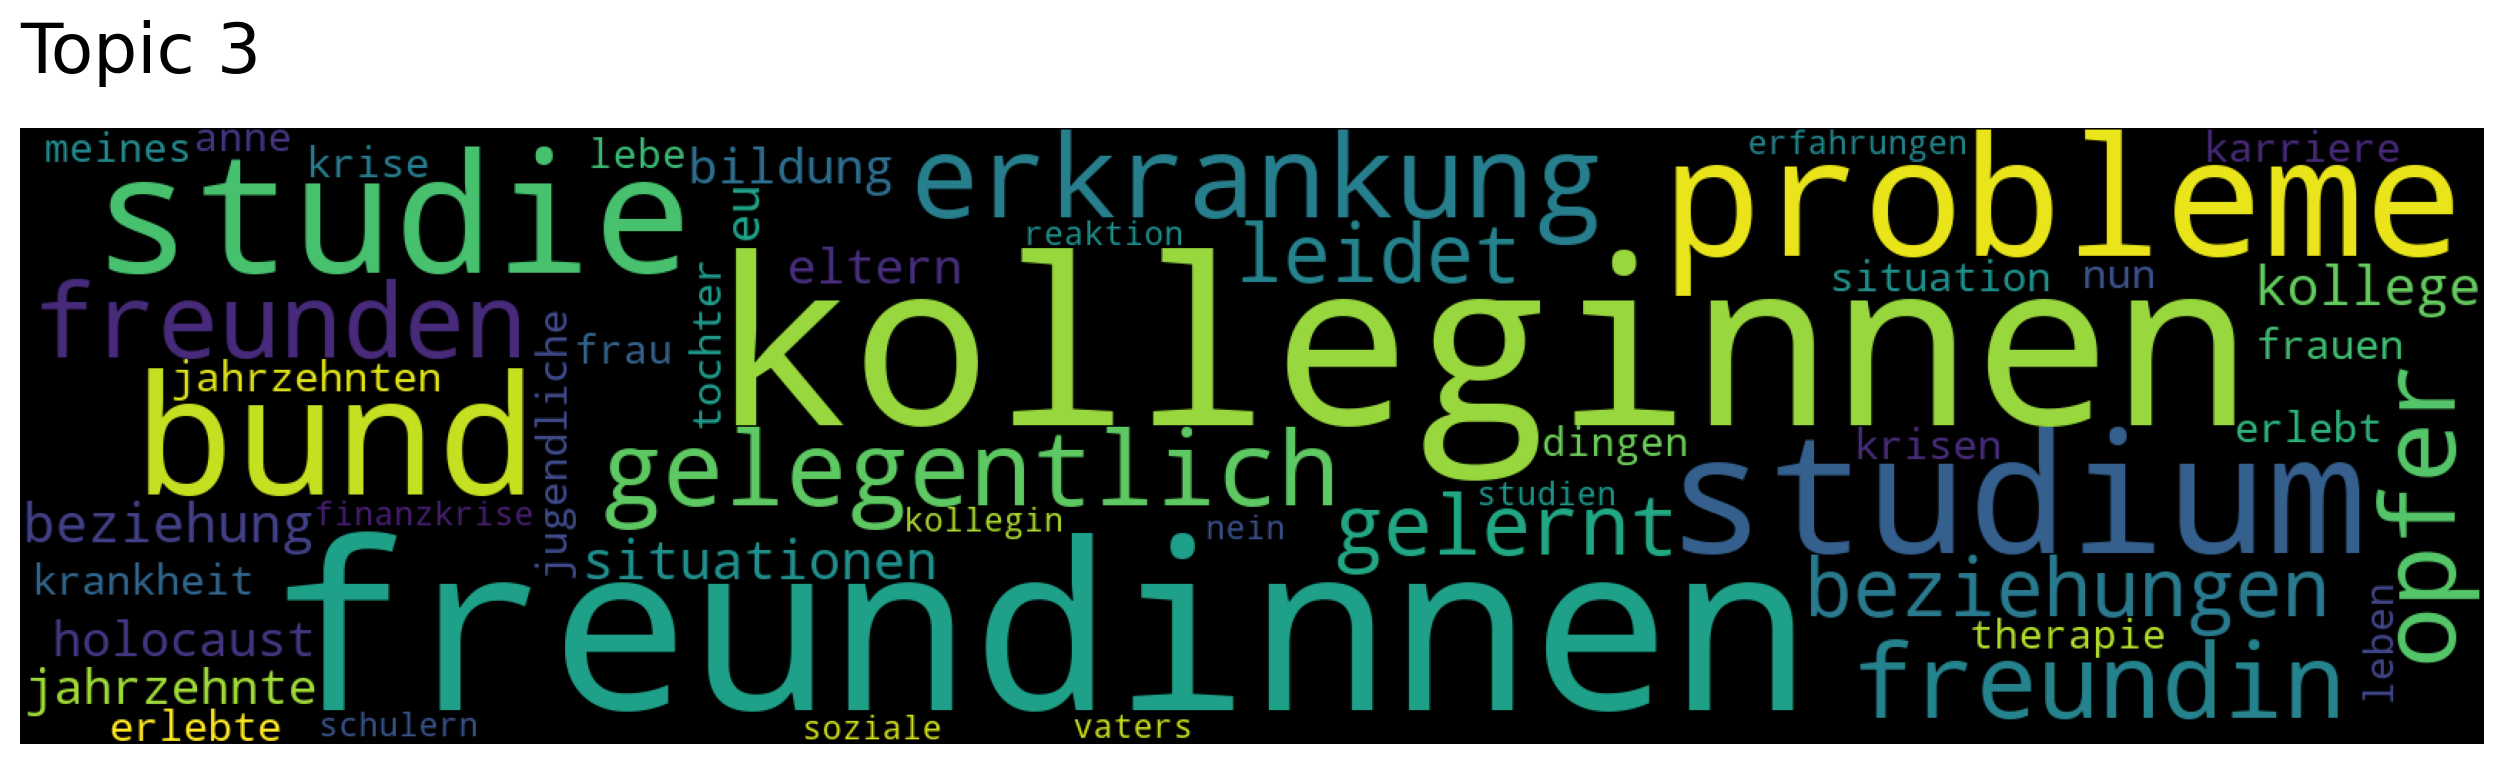

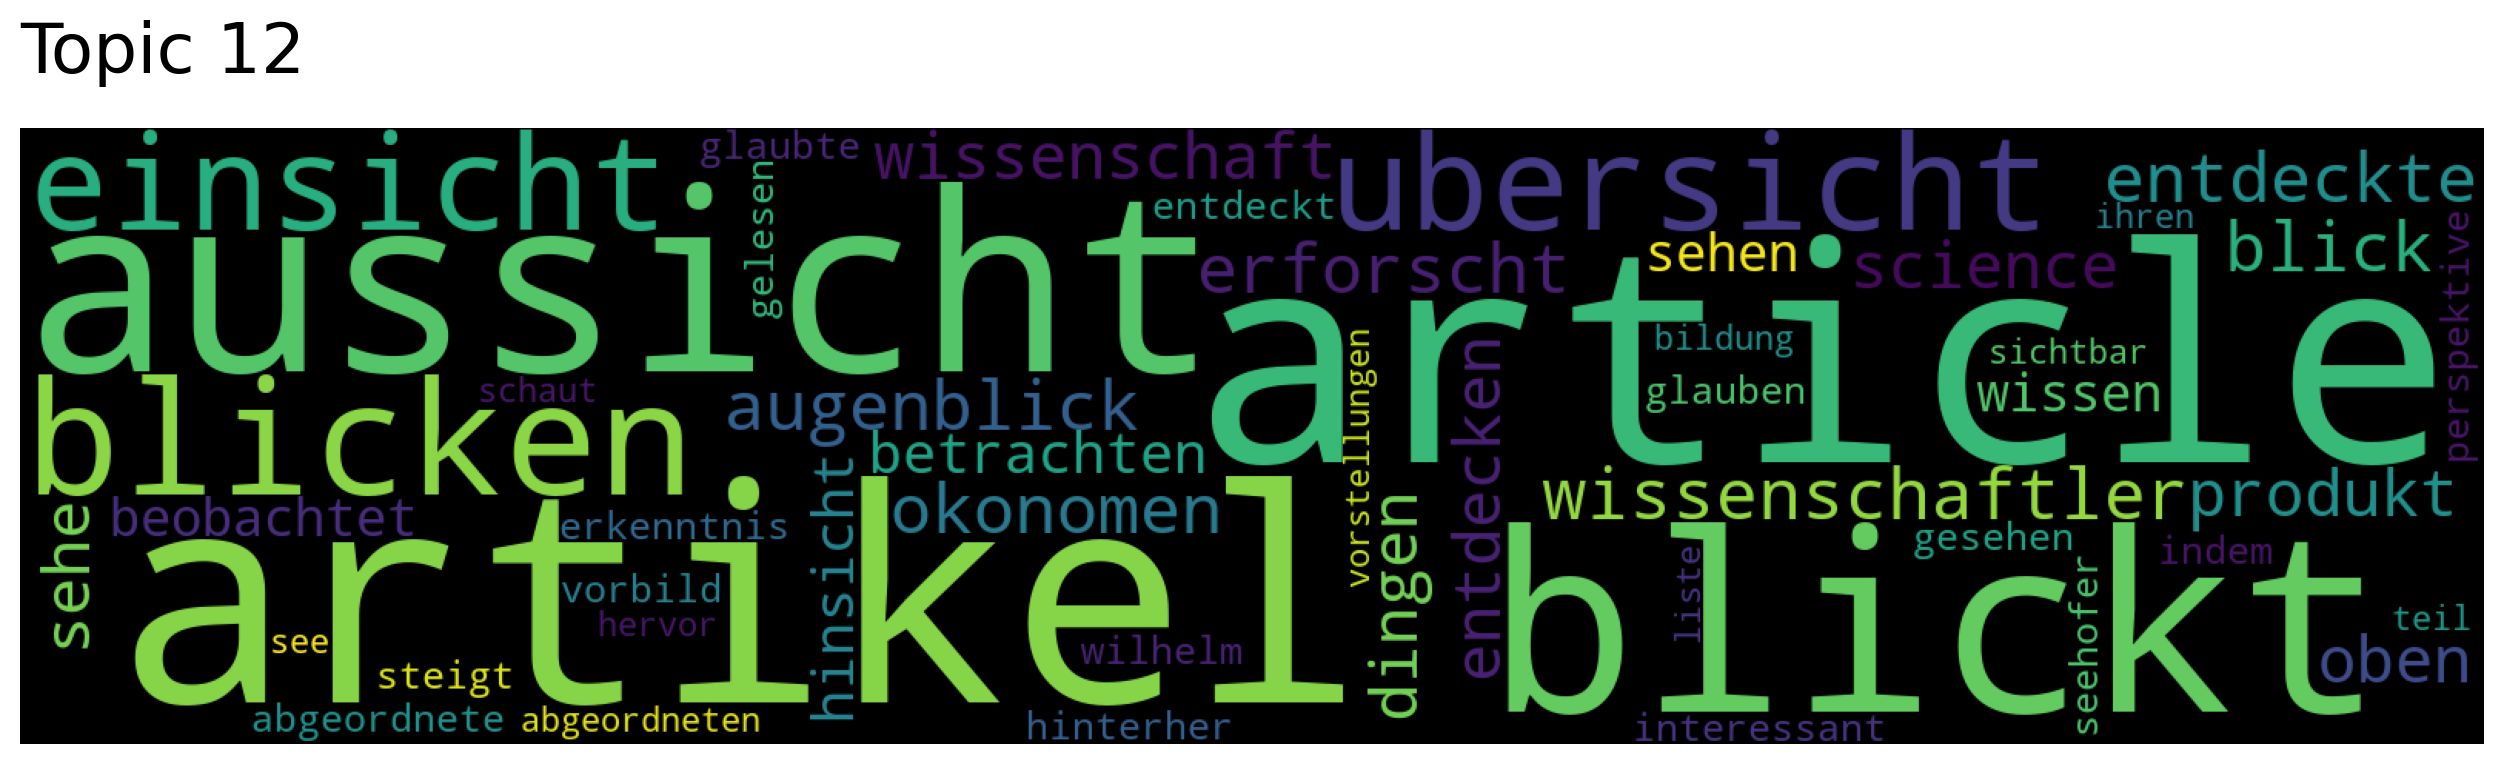

In [23]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=['Bildung'], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [16]:
words, word_scores = model.similar_words(keywords=["intelligenz", "becker"], keywords_neg=["künstliche"], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

ValueError: 'künstliche' has not been learned by the model so it cannot be searched.

In [17]:
words, word_scores = model.similar_words(keywords=["polizei", "krankenhaus", "covid"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

krankenhauser 0.7015581005535194
dr 0.5955919002787234
habt 0.5945802919890126
schicken 0.5935829836030898
st 0.589221848499227
arzt 0.5859920554537454
arzte 0.5857309120988696
heim 0.5812007566686515
lkw 0.5764153636543289
video 0.5734391863253885
klinik 0.5731673961666366
youtube 0.5703274849762254
werner 0.5638252285571724
gast 0.5634153401798208
bewohner 0.5629159439892906
wirft 0.5599929498338249
eins 0.5598369222045891
gang 0.5593972039818959
manches 0.5571761917559873
parteien 0.5565197865010838
